 ___
# Atividade: Teorema do Limite Central 
___

## Aula 16

**Preparo Prévio:**
1. Magalhães e Lima (7ª. Edição): Seção 7.3 (págs 238 a 244).

**Hoje:**
1. Compreender o Teorema do Limite Central.


**Próxima aula:**
1.	Leitura prévia necessária: Magalhães e Lima (7ª. Edição): Cap. 8 (págs 259 a 273).
___

In [7]:
%matplotlib inline
%reset -f

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Exemplo 1: #

Um Professor de Ciência dos Dados resolve fazer uma avaliação diferente com os alunos. O aluno irá jogar uma moeda justa 1000 vezes. Cada vez que sair CARA o aluno ganha nota DEZ, cada vez que sair COROA o aluno ganha nota ZERO. Ao final calcula-se a média das notas.

a) Faça uma simulação de 1000 jogadas da moeda, calcule a média e o desvio padrão da variável. Usar **stats.randint** para simular as jogadas. 

In [8]:
jogadas=stats.randint.rvs(0,2,size=1000)
jogadas *= 10
nota=pd.Series(jogadas).value_counts()
nota

0     510
10    490
dtype: int64

b) Faça o **gráfico de barras** da variável. usar o **value_counts()** do Pandas para gerar esse gráfico.

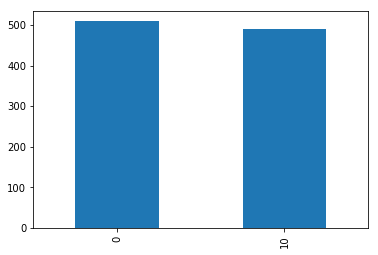

In [9]:
nota.plot(kind = "bar")

Agora simule a média da sala de aula com os 120 alunos das 3 turmas.

Se $\bar{X}$ é média da sala (NÃO confundir com a média do aluno $\mu_X$) , então:
$$\bar{X} = \frac{X_1+X_2+...+X_n}{n} = \frac{\sum_{i=1}^n X_i}{n}$$

onde n = 120 alunos.

c) Faça o histograma de $\bar{X}$. Lembre-se da aula passada.

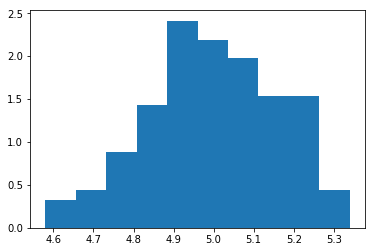

In [10]:
E=[]
for e in range(120):
    jogadas=stats.randint.rvs(low=0,high=2,size=1000)
    jogadas *= 10
    nota=pd.Series(jogadas)
    soma=0
    for i in nota:
        soma+=i  
    media=soma/len(nota)
    E.append(media)
        
    

plt.hist(sorted(E),normed=True,bins=10)
plt.show()

d) Calcule a média e o desvio padrão de Y.    

In [25]:
media=np.mean(E)
print('Essa é a média {}'.format(media))
print()


sigma=np.std(E)
print('Essa é o sigma {}'.format(sigma))


Essa é a média 4.996583333333334

Essa é o sigma 0.16255509749688635


e) O que você pode dizer sobre a distribuição de Y? Faça o fit da normal e plote o pdf sobre o histograma.

# Teorema do Limite Central #

Dado $X_i$ uma variável aleatória iid (independente e identicamente distribuída) de uma distribuição qualquer, tem-se que:

$$\bar{X}=\frac{X_1+X_2+...+X_n}{n}=\frac{\sum_{i=1}^n X_i}{n} \sim N\left(\mu_X,\frac{\sigma_X^2}{n}\right)$$

Quando n for suficientemente grande.

Em alguns casos específicos, pode-se considerar $X_i$ com distribuições diferentes ou com certa dependência entre elas.


'Média Amostral: 0.01, Desvio Padrão Amostral: 0.28\n'

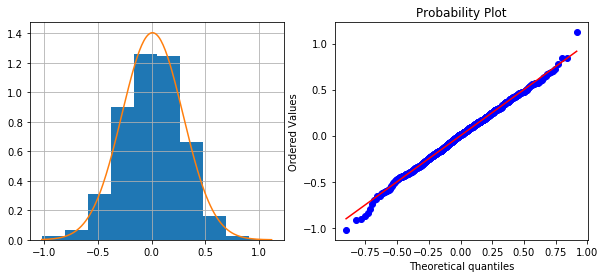

In [8]:
# %load TLC.py
func = {'norm': stats.norm, 'expon': stats.expon, 'uniform': stats.uniform, 't': stats.t, 
        'chi2': stats.chi2, 'f': stats.f, 'gamma': stats.gamma, 'beta': stats.beta}

#Se não visualizar o pywidgets:
#conda install -c conda-forge ipywidgets

#Função que utiliza o pywidget
@interact(n = (1, 20, 1), distribuição = sorted(list(func.keys())))
def f(distribuição = 'norm', n = 1):
    
    size = 1000
    loc = 0
    scale = 1
    
    arg = {'loc': loc, 'scale': scale, 'size': size}
    
    #Cada distribuição tem seu conjunto de parâmetros específicos
    if distribuição == 't':
        arg['df'] = 5
    elif distribuição == 'chi2':
        arg['df'] = 5
    elif distribuição == 'f':
        arg['dfn'] = 5
        arg['dfd'] = 7
    elif distribuição == 'gamma':
        arg['a'] = 1
    elif distribuição == 'beta':
        arg['a'] = 0.5
        arg['b'] = 0.5
    
    #Gerar n vetores de 1000 amostras cada
    Xb = func[distribuição].rvs(**arg)
    for i in range(n-1):
        Xb += func[distribuição].rvs(**arg)
        
    #Calcular a média
    Xb = Xb / n
    
    #Prints
    fig = plt.figure(figsize=(10,4))
    
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    
    #Histograma
    pd.Series(Xb).hist(normed=True, ax=ax1)
    
    #Fit e print da pdf
    (mu, sigma) = stats.norm.fit(Xb)
    x = np.arange(Xb.min(), Xb.max(), 0.01)
    ax1.plot(x, stats.norm.pdf(x, loc = mu, scale=sigma))
    
    #QQ-Plot
    stats.probplot(Xb, dist=stats.norm, sparams=(mu, sigma), plot=ax2)
    
    return "Média Amostral: {0:0.2f}, Desvio Padrão Amostral: {1:0.2f}\n".format(Xb.mean(),Xb.std())